In [1]:
from pyvis.network import Network
import sdmdlvis as mv

In [2]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1.0, stoptime=10.0, dt=1.0, name='Watershed')
pond = model.stock('pond')
fixed = model.constant('fixed')
fixed.equation = 3.0
factor = model.converter('factor')
factor.equation = 2.0 * fixed
inflow = model.flow('inflow')
inflow.equation = sd.trend(model, factor, 1.0, 1.0) + sd.smooth(model, fixed, 1.0, 1.0)
pond.equation = inflow

In [3]:
mg = mv.model_graph(model, collapse=False)
nt = Network('400px', '100%', directed=True, notebook=True, cdn_resources='in_line')
nt.from_nx(mg)
nt.show('mgnx.html')

mgnx.html


In [4]:
mg = mv.model_graph(model, collapse=True)
nt = Network('400px', '100%', directed=True, notebook=True, cdn_resources='in_line')
nt.from_nx(mg)
nt.show('mgnx2.html')

mgnx2.html


## Visualise model graph - static

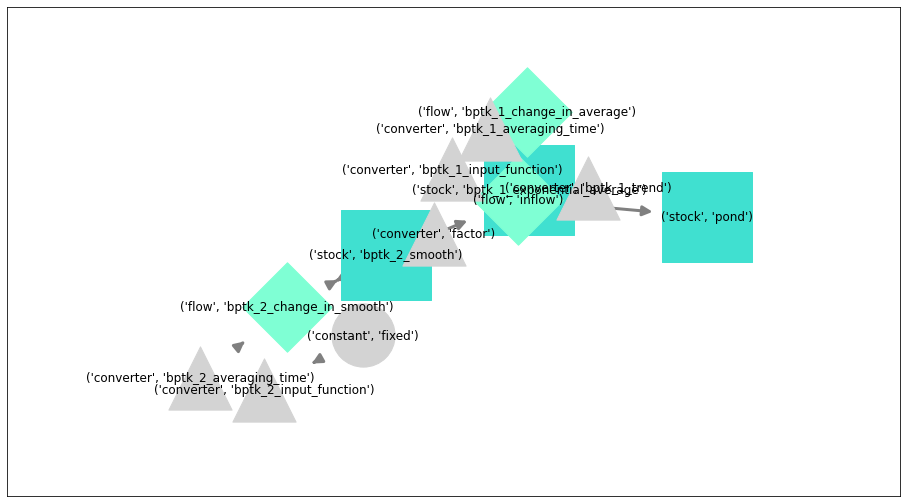

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.gca().margins(0.3)
mv.draw_model_graph(model, ax=plt.gca(), eqn=False)
plt.show()